# Time2Feat - An exploratory approach

In [3]:
from cookie_clusters import *

In [4]:
import os
import sys
import pickle

In [5]:
sys.path
sys.path.append("/home/julian/FilRouge_territoires")
sys.path

['/home/julian/FilRouge_territoires/notebooks',
 '/home/julian/miniconda3/envs/FilRouge/lib/python39.zip',
 '/home/julian/miniconda3/envs/FilRouge/lib/python3.9',
 '/home/julian/miniconda3/envs/FilRouge/lib/python3.9/lib-dynload',
 '',
 '/home/julian/miniconda3/envs/FilRouge/lib/python3.9/site-packages',
 '/home/julian/FilRouge_territoires']

In [6]:
file = open('../data/processed/pixels_de_interet_dic.pkl', 'rb')
dic_de_pixels = pickle.load(file)
file.close()

file = open('../data/processed/pixels_de_interet_list.pkl', 'rb')
pixels_de_interet = pickle.load(file)
file.close()

data_cube = np.loadtxt('../data/processed/(54, 141, 6).csv', delimiter=",")
data_cube = data_cube.reshape(54, 141, 6)

In [7]:
from t2f.extraction.extractor import feature_extraction
from t2f.utils.importance_old import feature_selection
from t2f.model.clustering import ClusterWrapper

# Feature extraction T2F
df_feats_i = feature_extraction(data_cube, batch_size=100, p=1)
display(df_feats_i.shape)

Feature Extraction: 100%|██████████| 324/324 [00:17<00:00, 18.53it/s]


(54, 4818)

In [35]:
model_type = 'Hierarchical'
transform_type = 'minmax'
labels = {} # There's possible to use the semi-supervised approach !!!
n_clusters = 5

# Feature Selection
context = {'model_type': model_type, 'transform_type': transform_type}
top_feats = feature_selection(df_feats_i, labels=labels, context=context)
df_feats = df_feats_i[top_feats]

In [36]:
# Clustering
model = ClusterWrapper(n_clusters=n_clusters, model_type=model_type, transform_type=transform_type)
yhat = model.fit_predict(df_feats)
print(yhat.shape)

(54,)


In [37]:
eval = evaluator_de_experiences(yhat, pixels_de_interet, dic_de_pixels, df_feats)

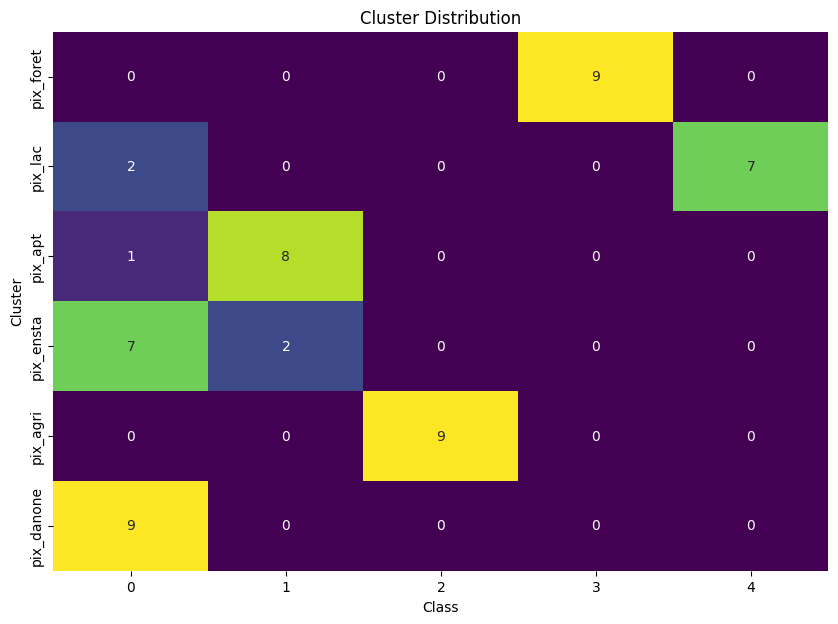

In [38]:
eval.cluster_distribution()

In [39]:
# TODO
# Implementre a general "Elbow method to select n_clusters" (This is one of the critical stages of appliying T2F)